In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import os
from math import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPool2D, GlobalAveragePooling2D, MaxPooling2D, AveragePooling2D, AvgPool2D
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Модуль распознавания 

In [2]:
main_path = "L:\\АвтоСтатистика\\"
main_path = "C:\\Users\\с\\Desktop\\"

In [3]:
#путь к train
path_train = main_path + "Распознавание текста\\text_recognising\\russian_shrift\\DOCS_masks\\train\\"
#путь к test
path_test = main_path + "Распознавание текста\\text_recognising\\russian_shrift\\DOCS_masks\\test\\"

In [4]:
resolution_x = 20
resolution_y = 45
batch_size =100

In [5]:
datagen = ImageDataGenerator(
        validation_split=0.25,
        rotation_range=2,
        rescale=1/255)
train_generator = datagen.flow_from_directory(
        path_train,
        target_size=(resolution_x, resolution_y),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=True,
        subset='training',
        seed=12345)
validation_generator = datagen.flow_from_directory(
        path_train,
        target_size=(resolution_x, resolution_y),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=True,
        subset='validation',
        seed=12345)

Found 38204 images belonging to 7 classes.
Found 12731 images belonging to 7 classes.


In [6]:
train_generator.class_indices

{'01B': 0, '01T': 1, '02B': 2, '02T': 3, '05B': 4, '05T': 5, 'other': 6}

In [7]:
train_features, train_target = next(train_generator)

In [8]:
print(train_features.shape)
print(train_target.shape)

(100, 20, 45, 3)
(100,)


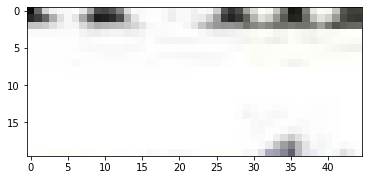

In [9]:
plt.imshow(train_features[15,:,:,:])

In [10]:
validation_generator.class_indices

{'01B': 0, '01T': 1, '02B': 2, '02T': 3, '05B': 4, '05T': 5, 'other': 6}

In [11]:
val_features, val_target = next(validation_generator)

In [12]:
print(val_features.shape)
print(val_target.shape)

(100, 20, 45, 3)
(100,)


In [13]:
alfabet1 = train_generator.class_indices
alfabet= {v:k for k, v in alfabet1.items()}
alfabet

{0: '01B', 1: '01T', 2: '02B', 3: '02T', 4: '05B', 5: '05T', 6: 'other'}

## MODEL0

In [14]:
optimizer =Adam(learning_rate=0.0005)
model0 = Sequential()

model0.add(Conv2D(filters=120,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(resolution_x, resolution_y, 3)))
model0.add(MaxPooling2D(pool_size=(2,2)))

model0.add(Conv2D(filters=60, kernel_size=(3,3), activation='relu'))
model0.add(MaxPooling2D(pool_size=(2,2)))

model0.add(Conv2D(filters=60, kernel_size=(3,3), activation='relu', padding ='same'))
model0.add(MaxPooling2D(pool_size=(2,2)))

#model0.add(Conv2D(filters=60, kernel_size=(3,3), activation='relu', padding ='same'))
#model0.add(MaxPooling2D(pool_size=(2,2)))

model0.add(Flatten())

model0.add(Dense(units=len(train_generator.class_indices), activation='softmax'))
   
model0.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 18, 43, 120)       3360      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 9, 21, 120)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 19, 60)         64860     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 9, 60)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 9, 60)          32460     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 4, 60)         0

## MODEL1

In [18]:
optimizer =Adam(learning_rate=0.0005)
model1 = Sequential()

model1.add(Conv2D(filters=120,
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=(resolution_x, resolution_y, 3)))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(filters=60, kernel_size=(3,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

#model1.add(Conv2D(filters=60, kernel_size=(3,3), activation='relu', padding ='same'))
#model1.add(MaxPooling2D(pool_size=(2,2)))

#model1.add(Conv2D(filters=60, kernel_size=(3,3), activation='relu', padding ='same'))
#model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(units=len(train_generator.class_indices), activation='softmax'))
   
model1.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 18, 43, 120)       3360      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 9, 21, 120)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 19, 60)         64860     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 3, 9, 60)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1620)              0         
                                                                 
 dense_1 (Dense)             (None, 7)                

## MODEL 2 SPBGU

In [19]:
optimizer =Adam(learning_rate=0.0005)
model2 = Sequential()

model2.add(Conv2D(16, (3, 3), padding='same', 
                 input_shape=(resolution_x, resolution_y, 3), activation='relu'))
model2.add(Conv2D(16, (3, 3), activation='relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.1))

model2.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))

model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.3))

#model2.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
#model2.add(Conv2D(128, (3, 3), activation='relu'))

#model2.add(MaxPooling2D(pool_size=(2,2)))
#model2.add(Dropout(0.5))

model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(33, activation='relu'))
model2.add(Dense(units=len(train_generator.class_indices), activation='softmax'))

model2.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 20, 45, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 18, 43, 16)        2320      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 9, 21, 16)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 9, 21, 16)         0         
                                                                 
 conv2d_14 (Conv2D)          (None, 9, 21, 32)         4640      
                                                                 
 conv2d_15 (Conv2D)          (None, 7, 19, 64)         18496     
                                                      

## LEARNING

In [20]:
model=model2
model.fit(train_generator, 
           validation_data=validation_generator,
           steps_per_epoch=10,
           validation_steps=5,
           verbose=0,#2,
           shuffle=True,
           epochs=70)

In [21]:
model_path = main_path + "Распознавание текста\\text_recognising\\russian_shrift\\models\\"    

In [22]:
from datetime import datetime
current_datetime = datetime.now()
date = '_' + str(current_datetime.day)+'_' + str(current_datetime.month)

In [23]:
# serialize model to JSON
num = '_multy_'+ str(2)
model_name_json = "actual_model" + "_" + num+ date +".json"
model_name_h5 = "actual_model" + "_" + num + date + ".h5"

model_json = model.to_json()
with open(model_path + model_name_json, "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights(model_path + model_name_h5)
print("Saved model to disk")

Saved model to disk


## VALIDATION

In [24]:
#шаблон таблицы результатов
result = pd.DataFrame(index=range(batch_size), 
                      columns=['Буква', 'Класс', 'Расп. буква', 'Расп. класс', 'Вероятность,%'])
#result.head()

#предсказания на валидации
val = model.predict(val_features).round(2)
val = pd.DataFrame(val.T)
#val.head(33)

# заполнение результатов
for col in range(batch_size):
    result.loc[col, 'Вероятность,%'] = val.loc[:,col].max()
    result.loc[col, 'Расп. класс'] = val.loc[:,col].idxmax()
    result.loc[col, 'Расп. буква'] = alfabet[val.loc[:,col].idxmax()]
    result.loc[col, 'Класс'] = int(val_target[col])
    result.loc[col, 'Буква'] = alfabet[val_target[col]]
    result.loc[col, 'Буква'] = alfabet[val_target[col]]
result['Точность'] = result.apply(lambda x: 1 if x['Класс']==x['Расп. класс'] else 0, axis=1) 
print('-------------------------------------------------------------------------------')
print(result)
print('-------------------------------------------------------------------------------')
print('ТОЧНОСТЬ:',result['Точность'].mean())

-------------------------------------------------------------------------------
    Буква Класс Расп. буква Расп. класс Вероятность,%  Точность
0   other     6       other           6           1.0         1
1   other     6       other           6           1.0         1
2   other     6       other           6           1.0         1
3   other     6       other           6           1.0         1
4   other     6       other           6           1.0         1
..    ...   ...         ...         ...           ...       ...
95  other     6       other           6           1.0         1
96  other     6       other           6           1.0         1
97  other     6       other           6           1.0         1
98  other     6       other           6           1.0         1
99  other     6       other           6           1.0         1

[100 rows x 6 columns]
-------------------------------------------------------------------------------
ТОЧНОСТЬ: 1.0


In [25]:
result.groupby('Буква')['Точность'].mean().round(2)

Буква
other    1.0
Name: Точность, dtype: float64

(20, 45, 3)


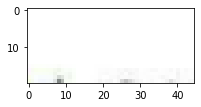

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


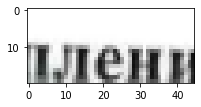

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


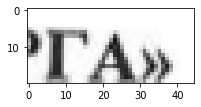

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


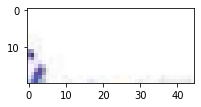

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


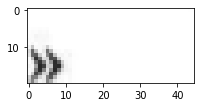

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


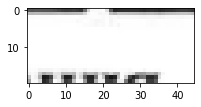

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


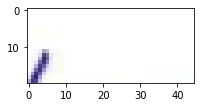

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


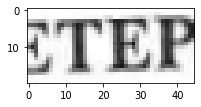

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


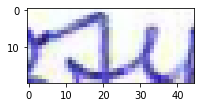

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


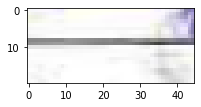

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


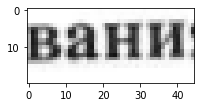

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


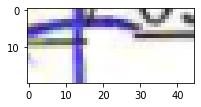

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


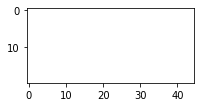

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


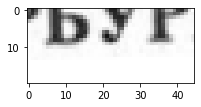

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


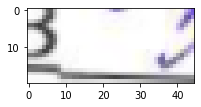

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


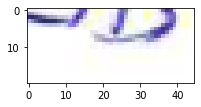

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


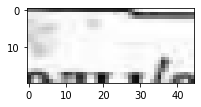

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


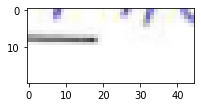

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


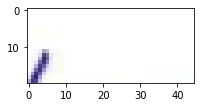

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


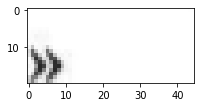

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other
(20, 45, 3)


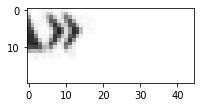

(1, 20, 45, 3)
Predicted class: 6
Predicted probability: 1.0
Predicted char: other


In [26]:
#predict = model.predict(val_features).round(2)
for i in np.random.randint(1,len(val_features),size=21):
    
    img = val_features[i,:,:,:]
    print(img.shape)  
    fig = plt.figure(figsize=(3,3))
    plt.imshow(img)
    plt.show()
    
    img1 = img.reshape(1, resolution_x, resolution_y, 3)
    print(img1.shape)
    predict = model.predict(img1).round(2)
    table=pd.DataFrame(predict[0])
    pred_class = int(table.idxmax())
    pred_proba = table.loc[pred_class].max()
    pred_char = alfabet[int(table.idxmax())]
    
    print('Predicted class:', pred_class)
    print('Predicted probability:', pred_proba)
    print('Predicted char:', pred_char)

## TEST

In [27]:
batch_size = 100

In [28]:
datagen = ImageDataGenerator(rescale=1/255)
test_generator = datagen.flow_from_directory(
        path_test,
        target_size=(resolution_x, resolution_y),
        color_mode="rgb",
        batch_size=batch_size,
        class_mode='sparse',
        shuffle = True,
        seed=12345)

Found 744 images belonging to 7 classes.


In [29]:
test_features, test_target = next(test_generator)

In [30]:
print(test_features.shape)
print(test_target.shape)

(100, 20, 45, 3)
(100,)


In [31]:
result = pd.DataFrame(index=range(batch_size), 
                      columns=['Буква', 'Класс', 'Расп. буква', 'Расп. класс', 'Вероятность,%'])
#result.head()

#предсказания на валидации
val = model.predict(test_features).round(2)
val = pd.DataFrame(val.T)
#val.head(33)
# заполнение результатов
for col in range(batch_size):
    result.loc[col, 'Вероятность,%'] = val.loc[:,col].max()
    result.loc[col, 'Расп. класс'] = val.loc[:,col].idxmax()
    result.loc[col, 'Расп. буква'] = alfabet[val.loc[:,col].idxmax()]
    result.loc[col, 'Класс'] = int(val_target[col])
    result.loc[col, 'Буква'] = alfabet[val_target[col]]
    result.loc[col, 'Буква'] = alfabet[val_target[col]]
result['Точность'] = result.apply(lambda x: 1 if x['Класс']==x['Расп. класс'] else 0, axis=1) 
print('-------------------------------------------------------------------------------')
print(result)
print('-------------------------------------------------------------------------------')
print('ТОЧНОСТЬ:',result['Точность'].mean())

-------------------------------------------------------------------------------
    Буква Класс Расп. буква Расп. класс Вероятность,%  Точность
0   other     6       other           6           1.0         1
1   other     6       other           6           1.0         1
2   other     6       other           6           1.0         1
3   other     6       other           6           1.0         1
4   other     6         02T           3           1.0         0
..    ...   ...         ...         ...           ...       ...
95  other     6         01T           1          0.96         0
96  other     6         05B           4           1.0         0
97  other     6       other           6           1.0         1
98  other     6       other           6           1.0         1
99  other     6       other           6           1.0         1

[100 rows x 6 columns]
-------------------------------------------------------------------------------
ТОЧНОСТЬ: 0.72


In [32]:
result.groupby('Буква')['Точность'].mean().round(2)

Буква
other    0.72
Name: Точность, dtype: float64

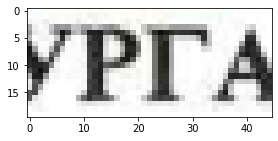

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


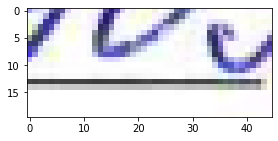

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


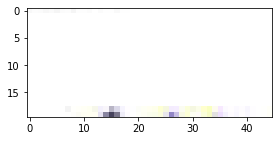

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


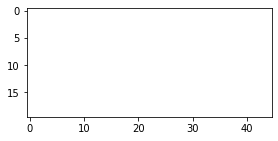

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


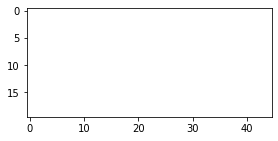

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


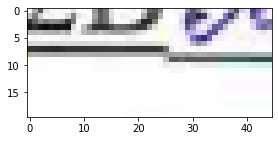

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


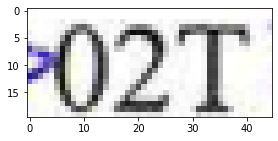

Predicted class: 3
Predicted probability: 1.0
Predicted char: 02T


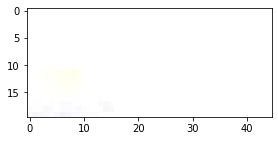

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


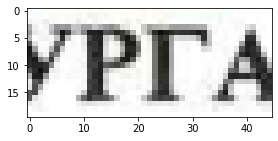

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


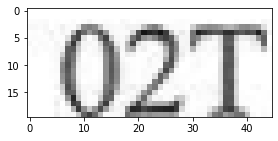

Predicted class: 3
Predicted probability: 1.0
Predicted char: 02T


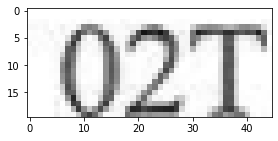

Predicted class: 3
Predicted probability: 1.0
Predicted char: 02T


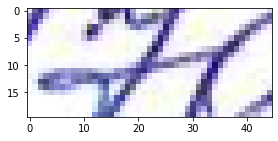

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


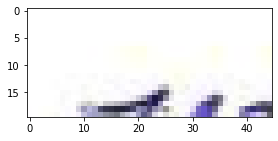

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


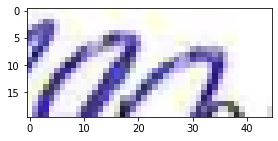

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


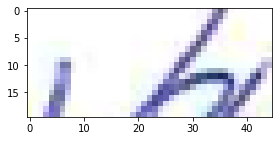

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


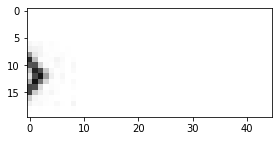

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


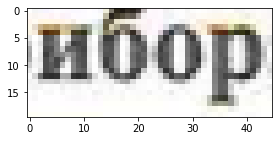

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


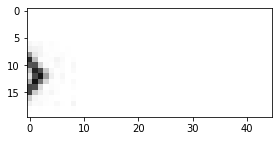

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


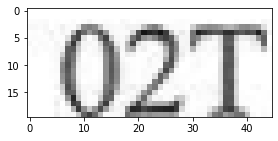

Predicted class: 3
Predicted probability: 1.0
Predicted char: 02T


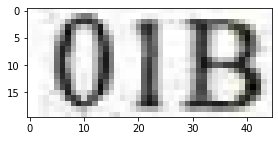

Predicted class: 0
Predicted probability: 1.0
Predicted char: 01B


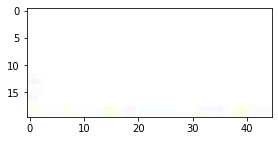

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


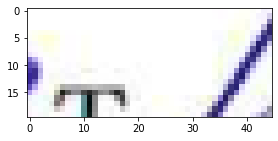

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


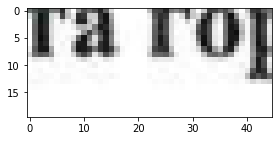

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


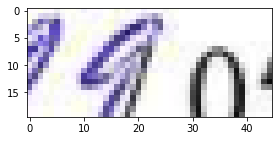

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


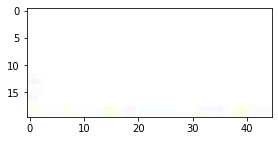

Predicted class: 6
Predicted probability: 1.0
Predicted char: other


In [33]:
predict = model.predict(test_features).round(2)
for i in np.random.randint(1,len(test_features),size=25):
    
    img = test_features[i,:,:,:]
      
    fig = plt.figure(figsize=(12,2))
    plt.imshow(img)
    plt.show()
    
    img = img.reshape(1, resolution_x, resolution_y, 3)
    predict = model.predict(img).round(2)
    table=pd.DataFrame(predict[0])
    pred_class = int(table.idxmax())
    pred_proba = table.loc[pred_class].max()
    pred_char = alfabet[int(table.idxmax())]
    
    print('Predicted class:', pred_class)
    print('Predicted probability:', pred_proba)
    print('Predicted char:', pred_char)